## Import Dataset: Hotel Bookings

In [2]:
import kagglehub
# 1. Define the dataset handle
dataset_handle = "kundanbedmutha/hotel-booking-reservation"

# 2. Download the dataset and get the path to the downloaded directory
path_to_dataset_dir = kagglehub.dataset_download(dataset_handle)

print(f"Dataset downloaded to: {path_to_dataset_dir}")

Dataset downloaded to: C:\Users\green\.cache\kagglehub\datasets\kundanbedmutha\hotel-booking-reservation\versions\1


In [3]:
import pandas as pd
import os

# 1. Define the specific file name within the downloaded folder
file_name = "hotel_bookings_updated_2024.csv" 

# 2. Construct the full path to the CSV file
full_file_path = os.path.join(path_to_dataset_dir, file_name)

# 3. Load the data into a DataFrame
df = pd.read_csv(full_file_path)

In [12]:
# Clean data
df = df.dropna(axis=0)

print(f"{df.shape}\n")
print(f"{df.describe()}\n")
print(df.columns)

(217, 33)

       is_canceled   lead_time  arrival_date_year  arrival_date_week_number  \
count   217.000000  217.000000              217.0                217.000000   
mean      0.078341   40.520737             2024.0                 26.792627   
std       0.269329   61.748375                0.0                 15.368870   
min       0.000000    0.000000             2024.0                  1.000000   
25%       0.000000   12.000000             2024.0                 14.000000   
50%       0.000000   27.000000             2024.0                 27.000000   
75%       0.000000   36.000000             2024.0                 41.000000   
max       1.000000  364.000000             2024.0                 52.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count                 217.000000                217.00000   
mean                   13.811060                  1.56682   
std                     9.105669                  1.49270   
min                     1.000000 

## Ensemble Models and Performance Comparison (Liu)

In [13]:
from sklearn.model_selection import train_test_split

# Drop rows with missing target values
df_clean = df.dropna(subset=['is_canceled'])   # adjust target column if needed

# Separate features (X) and target (y)
X = df_clean.drop('is_canceled', axis=1)  # target column
y = df_clean['is_canceled']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((173, 335), (44, 335))

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_pre = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Precision Score:", rf_pre)
print("Random Forest Recall Score:", rf_rec)

Random Forest Accuracy: 0.9772727272727273
Random Forest F1 Score: 0.6666666666666666
Random Forest Precision Score: 1.0
Random Forest Recall Score: 0.5


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

gb_acc = accuracy_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_pre = precision_score(y_test, gb_pred)
gb_rec = recall_score(y_test, gb_pred)

print("Gradient Boosting Accuracy:", gb_acc)
print("Gradient Boosting F1 Score:", gb_f1)
print("Gradient Boosting Precision Score:", gb_pre)
print("Gradient Boosting Recall Score:", gb_rec)

Gradient Boosting Accuracy: 1.0
Gradient Boosting F1 Score: 1.0
Gradient Boosting Precision Score: 1.0
Gradient Boosting Recall Score: 1.0


In [17]:
print("MODEL COMPARISON")
print("-----------------")
print(f"Random Forest     | Accuracy: {rf_acc:.4f} | F1: {rf_f1:.4f} | Precision: {rf_pre:.4f} | Recall: {rf_rec:.4f}")
print(f"Gradient Boosting | Accuracy: {gb_acc:.4f} | F1: {gb_f1:.4f} | Precision: {gb_pre:.4f} | Recall: {gb_rec:.4f}")

MODEL COMPARISON
-----------------
Random Forest     | Accuracy: 0.9773 | F1: 0.6667 | Precision: 1.0000 | Recall: 0.5000
Gradient Boosting | Accuracy: 1.0000 | F1: 1.0000 | Precision: 1.0000 | Recall: 1.0000


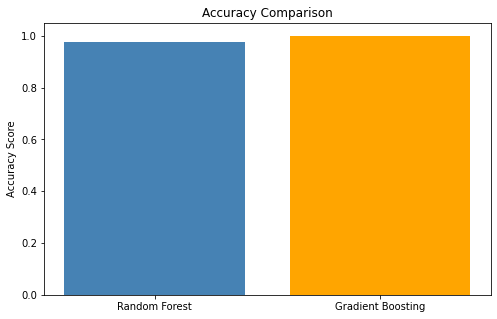

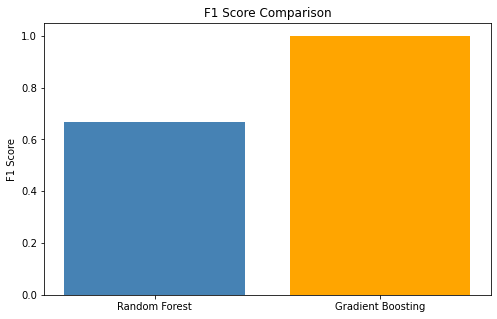

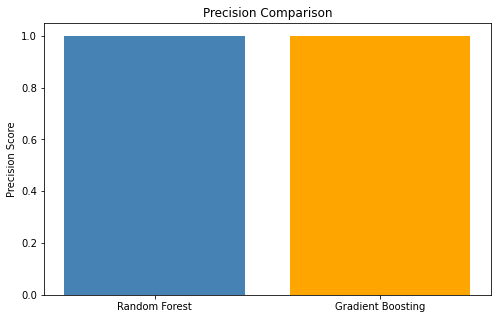

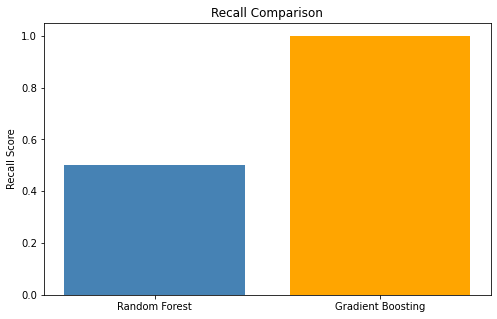

In [18]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Gradient Boosting']
accuracy_scores = [rf_acc, gb_acc]
f1_scores = [rf_f1, gb_f1]
pre_scores = [rf_pre, gb_pre]
rec_scores = [rf_rec, gb_rec]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy_scores, color=['steelblue','orange'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(models, f1_scores, color=['steelblue','orange'])
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(models, pre_scores, color=['steelblue','orange'])
plt.title("Precision Comparison")
plt.ylabel("Precision Score")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(models, rec_scores, color=['steelblue','orange'])
plt.title("Recall Comparison")
plt.ylabel("Recall Score")
plt.show()